# IMPORT LIBRARY

In [34]:
# Mengimpor pustaka untuk menyimpan dan memuat objek Python
import pickle
# Mengimpor pustaka pandas untuk manipulasi dan analisis data
import pandas as pd
# Mengimpor pustaka numpy untuk operasi matematika dan array
import numpy as np
# Mengimpor pustaka matplotlib untuk visualisasi data dasar
import matplotlib.pyplot as plt
# Mengimpor pustaka seaborn untuk visualisasi data tingkat lanjut
import seaborn as sns
# Mengimpor SimpleImputer dari scikit-learn untuk menangani nilai yang hilang dengan imputasi
from sklearn.impute import SimpleImputer
# Mengimpor fungsi untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split
# Mengimpor alat untuk menampilkan matriks kebingungan, laporan klasifikasi, dan mengukur akurasi
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
# Mengimpor alat untuk membuat pipeline dari berbagai langkah pemrosesan data dan model
from sklearn.pipeline import make_pipeline
# Mengimpor model regresi logistik untuk klasifikasi
from sklearn.linear_model import LogisticRegression
# Mengimpor MinMaxScaler untuk normalisasi fitur ke rentang [0, 1]
from sklearn.preprocessing import MinMaxScaler
# Mengimpor DummyClassifier sebagai baseline untuk perbandingan model
from sklearn.dummy import DummyClassifier
# Mengimpor Pipeline untuk menggabungkan beberapa langkah pemrosesan dan pemodelan menjadi satu pipeline
from sklearn.pipeline import Pipeline
# Mengimpor fungsi untuk melakukan validasi silang pada model
from sklearn.model_selection import cross_val_score
# Mengimpor fungsi untuk menghitung dan menampilkan kurva ROC, nilai AUC, dan kurva Precision-Recall
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
# Periksa multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Cross-validation
from sklearn.model_selection import cross_val_score
#Penanganan Ketidakseimbangan Kelas
# Mengimpor SMOTE dari pustaka imblearn untuk menangani ketidakseimbangan kelas
from imblearn.over_sampling import SMOTE
# Mengimpor make_pipeline dari imblearn.pipeline untuk membuat pipeline dengan penanganan data yang tidak seimbang
from imblearn.pipeline import make_pipeline as make_imb_pipeline

# LOAD DATASET

In [2]:
# Membaca data dari file CSV bernama 'framingham.csv' ke dalam DataFrame
# DataFrame adalah struktur data seperti tabel yang digunakan oleh pandas
# Ini memungkinkan manipulasi dan analisis data dengan cara yang mudah dan efisien
df = pd.read_csv("framingham.csv")

In [3]:
# Menampilkan lima baris pertama dari DataFrame untuk melihat gambaran awal data
# df.head() membantu memeriksa struktur, kolom, dan beberapa nilai data awal
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [4]:
# Menampilkan dimensi DataFrame sebagai pasangan (jumlah baris, jumlah kolom)
# df.shape mengembalikan tuple yang menunjukkan ukuran DataFrame
# Berguna untuk memahami jumlah data yang kita miliki dan memeriksa integritasnya
df.shape

(4238, 16)

In [5]:
# Menampilkan informasi ringkas tentang DataFrame
# df.info() memberikan ringkasan tentang kolom, tipe data, dan jumlah nilai yang hilang
# Berguna untuk memahami struktur, tipe data, dan integritas data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# Menampilkan statistik deskriptif dari DataFrame untuk kolom numerik
# df.describe() memberikan ringkasan statistik seperti count, mean, std, min, dan max
# Berguna untuk memahami distribusi data dan mendeteksi nilai ekstrem
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

# PREPROSSESING DATA

In [7]:
# Menghitung jumlah baris duplikat dalam DataFrame
# df.duplicated() mengembalikan seri boolean yang menunjukkan duplikat
# .sum() menjumlahkan nilai True, menunjukkan total baris duplikat
# Berguna untuk deteksi dan penanganan data duplikat yang mungkin mengganggu analisis
df.duplicated().sum()

0

In [8]:
# Menghapus kolom 'education' dari DataFrame secara permanen
# df.drop() dengan argumen columns menghapus kolom yang ditentukan
# inplace=True menerapkan perubahan langsung ke DataFrame tanpa membuat salinan baru
# Berguna untuk menyederhanakan data jika kolom 'education' tidak relevan untuk analisis
df.drop(columns='education', inplace=True)

In [9]:
# Menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame
# df.isna() menghasilkan DataFrame boolean di mana nilai True menunjukkan keberadaan nilai NaN
# .sum() menjumlahkan nilai True (jumlah nilai NaN) untuk setiap kolom
# .sort_values(ascending=False) mengurutkan hasil secara menurun (dari yang paling banyak nilai NaN)
# Berguna untuk mengetahui kolom mana yang memiliki nilai NaN paling banyak
df.isna().sum().sort_values(ascending=False)

glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [10]:
# Mengisi nilai yang hilang (NaN) dalam kolom 'cigsPerDay' dengan 0.0 secara permanen
# df['cigsPerDay'].fillna() digunakan untuk mengisi nilai yang hilang dengan nilai tertentu
# value=0.0 menentukan nilai yang akan digunakan untuk pengisian
# inplace=True menerapkan perubahan langsung ke DataFrame tanpa membuat salinan baru
# Berguna jika nilai yang hilang dalam 'cigsPerDay' tidak dapat diimputasi dengan nilai lain
df['cigsPerDay'].fillna(value=0.0, inplace=True)

# DISTRIBUSI DATA

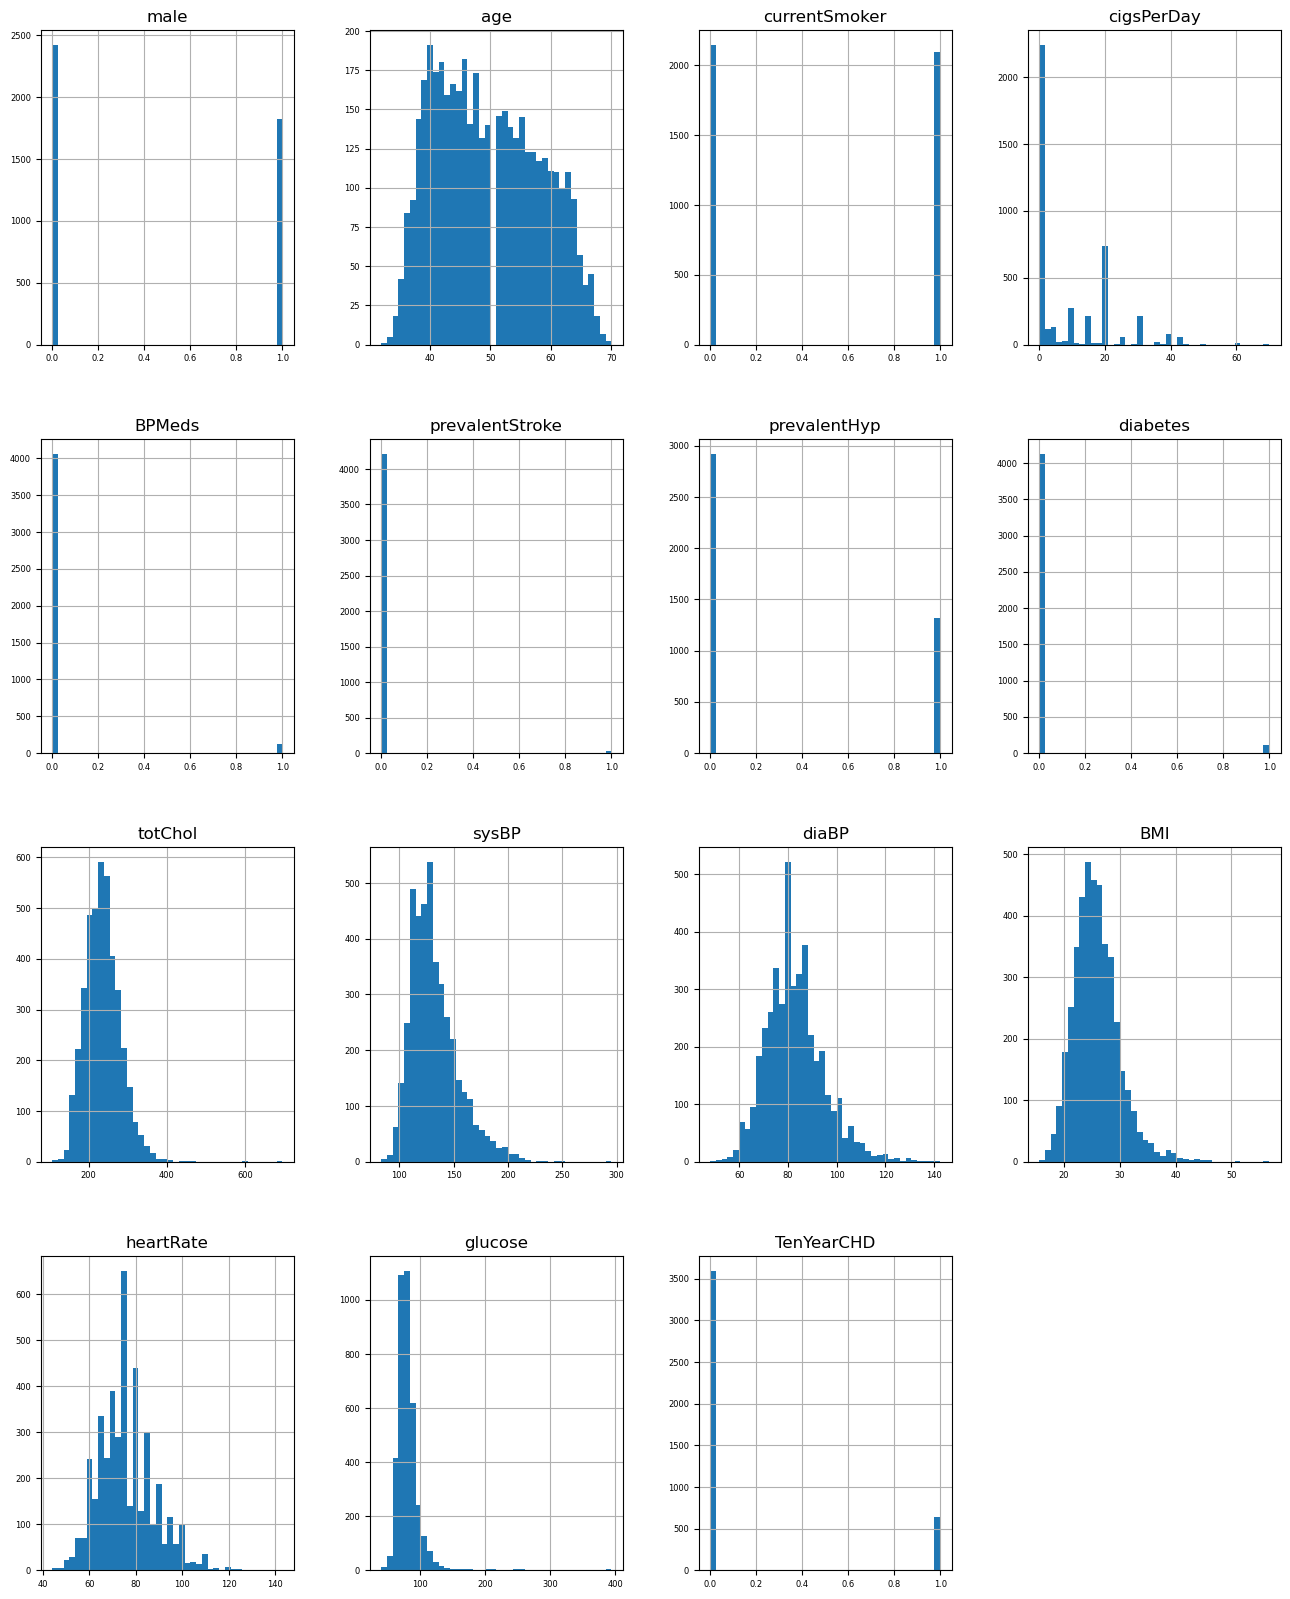

In [11]:
# Membuat histogram untuk setiap kolom dalam DataFrame
# df.hist() menghasilkan histogram untuk setiap kolom numerik dalam DataFrame
# figsize=(16, 20) menentukan ukuran gambar (panjang, tinggi) dalam inci
# bins=40 menentukan jumlah bin atau kelompok data dalam histogram
# xlabelsize=6 dan ylabelsize=6 menentukan ukuran label sumbu x dan y dalam histogram
# Berguna untuk mengeksplorasi distribusi data dan mendapatkan wawasan visual tentang variabel
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

In [ ]:
Berdasarkan analisis distribusi variabel dalam dataset kesehatan, berikut adalah kesimpulan yang dapat diambil:

Distribusi Demografi dan Kebiasaan:
1. Mayoritas responden adalah laki-laki.
2. Responden kebanyakan berusia 40 hingga 60 tahun.
3. Proporsi perokok dan bukan perokok hampir seimbang.

Kondisi Kesehatan:
1. Sebagian besar responden tidak menggunakan obat tekanan darah.
2. Mayoritas responden tidak pernah mengalami stroke.
3. Banyak responden memiliki hipertensi.
4. Mayoritas responden tidak menderita diabetes.

Parameter Kesehatan:
1. Sebagian besar responden memiliki kolesterol, tekanan darah sistolik, dan diastolik dalam kisaran normal.
2. Sebagian besar responden memiliki Indeks Massa Tubuh (BMI) dalam kisaran kelebihan berat badan.
3. Mayoritas responden memiliki detak jantung normal.
4. Sebagian besar responden memiliki kadar glukosa normal, namun ada yang menunjukkan risiko diabetes.
5. Sebagian besar responden tidak berisiko terkena penyakit 
jantung koroner dalam sepuluh tahun ke depan (0), tetapi ada sebagian kecil yang berisiko (1).

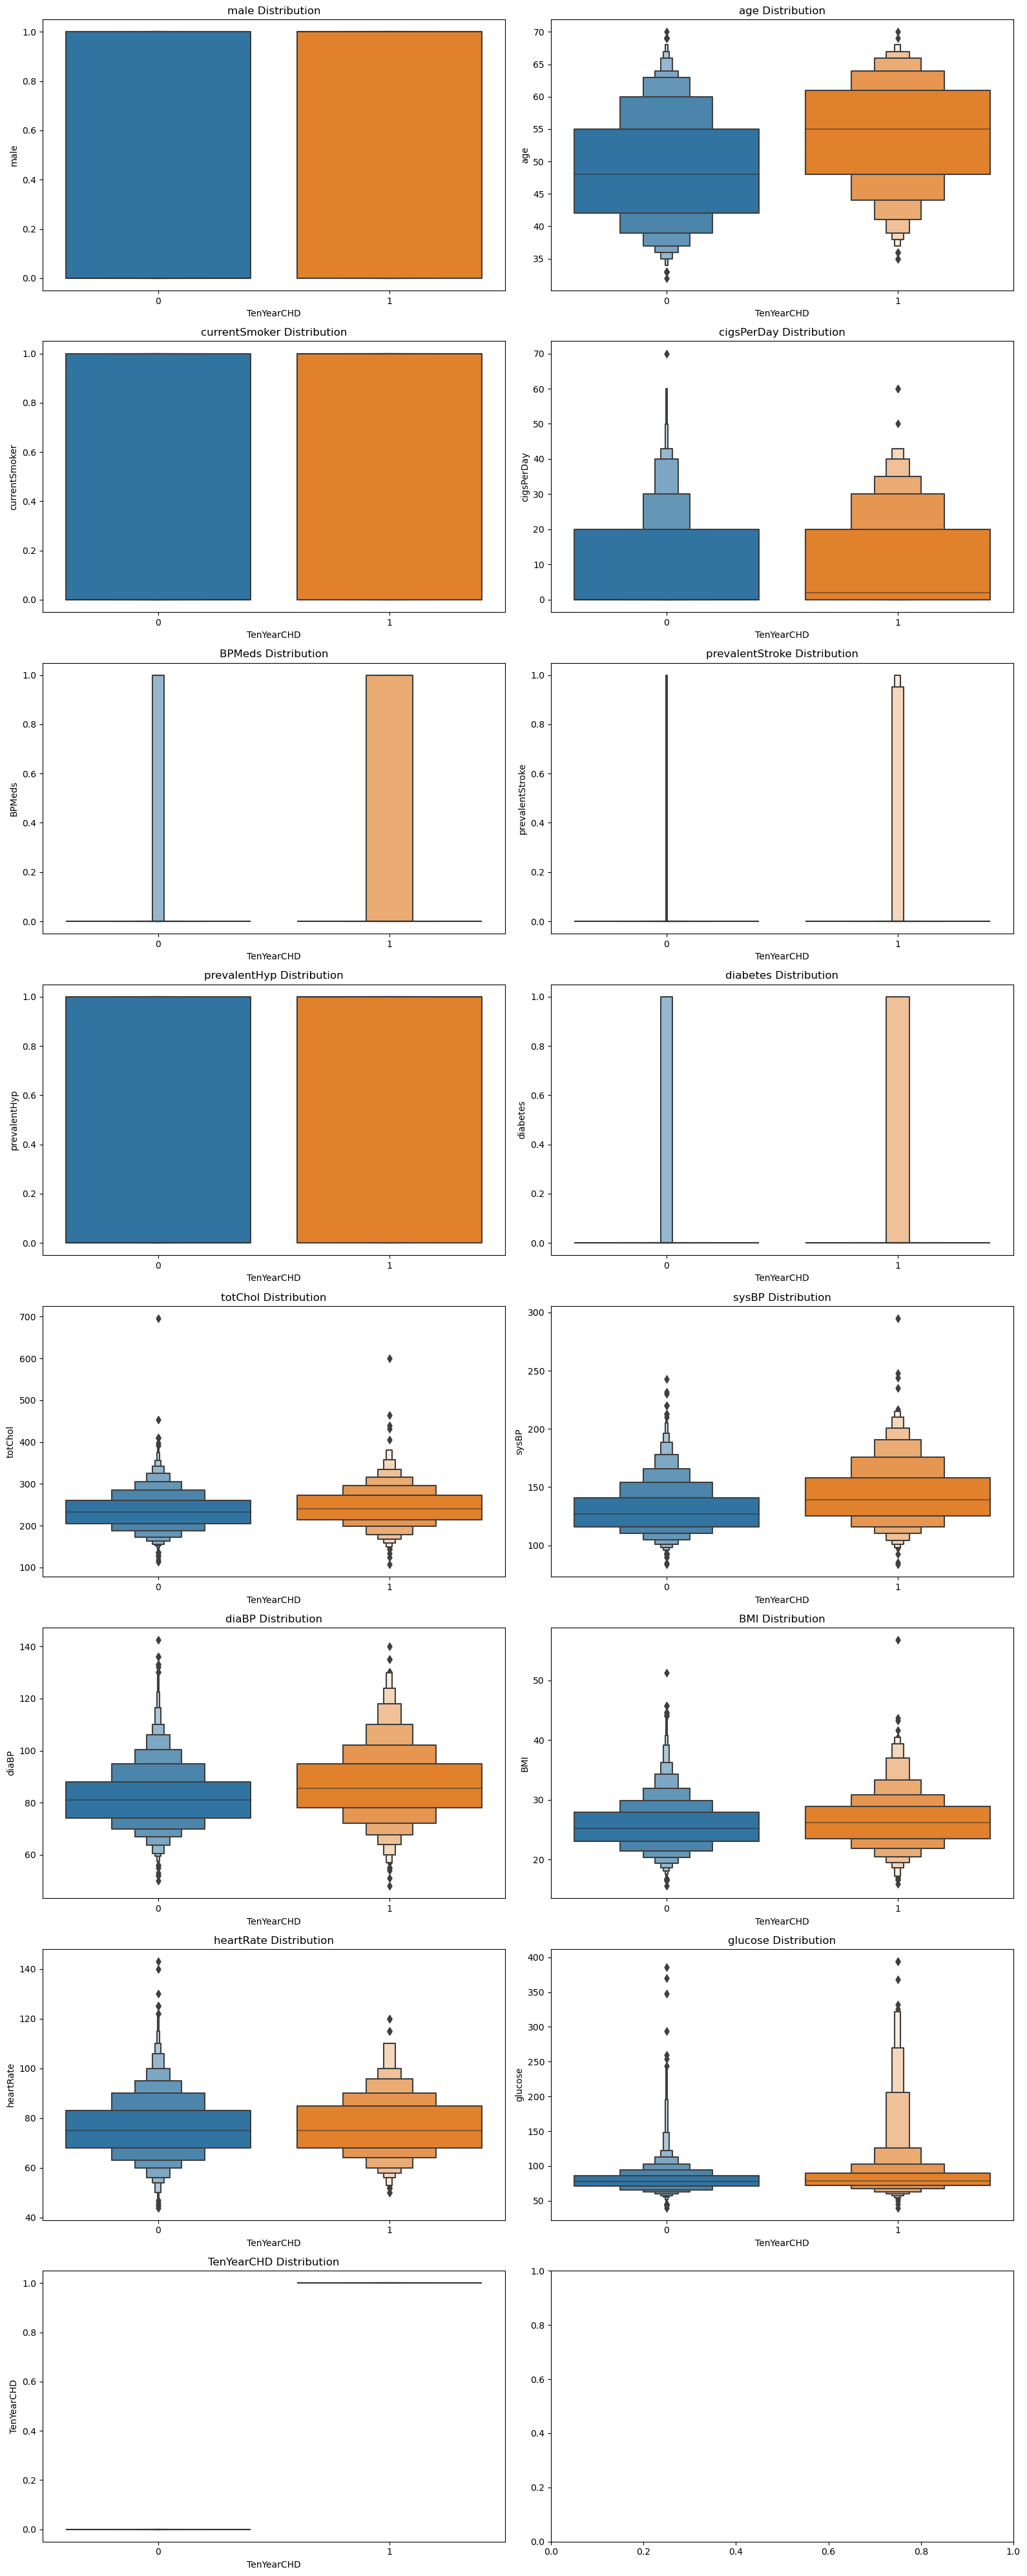

In [12]:
# Membuat subplots untuk menampilkan boxen plot untuk setiap kolom numerik dalam DataFrame
# figsize=(16, 40) menentukan ukuran gambar (panjang, tinggi) dalam inci
# Menggunakan sns.boxenplot untuk menampilkan distribusi data dalam hubungannya dengan kolom 'TenYearCHD'
# Looping melalui setiap kolom dan mengatur posisi plot di grid subplot
fig, axes = plt.subplots(nrows=(len(df.columns) + 1) // 2, ncols=2, figsize=(16, 40))

for idx, column in enumerate(df):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot(x='TenYearCHD', y=column, data=df, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel('TenYearCHD')
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()

Gambar yang ditampilkan adalah kumpulan plot distribusi fitur dalam hubungannya dengan variabel target 'TenYearCHD' (penyakit jantung koroner dalam 10 tahun). Fitur kategori seperti 'male', 'currentSmoker', dan 'prevalentHyp' menunjukkan distribusi yang seimbang antara mereka yang mengalami dan tidak mengalami CHD, sementara fitur 'BPMeds', 'prevalentStroke', dan 'diabetes' lebih sering muncul pada individu yang mengalami CHD. Untuk fitur numerik, nilai usia ('age'), tekanan darah sistolik ('sysBP'), dan kadar glukosa ('glucose') lebih tinggi pada individu yang mengalami CHD. Jumlah rokok per hari ('cigsPerDay') juga lebih tinggi pada kelompok ini, sedangkan distribusi kolesterol total ('totChol'), tekanan darah diastolik ('diaBP'), indeks massa tubuh ('BMI'), dan detak jantung ('heartRate') cukup mirip antara kedua kelompok. Secara keseluruhan, usia, tekanan darah sistolik, dan kadar glukosa menunjukkan perbedaan signifikan antara individu yang mengalami dan tidak mengalami CHD, memberikan wawasan penting untuk analisis data lebih lanjut.

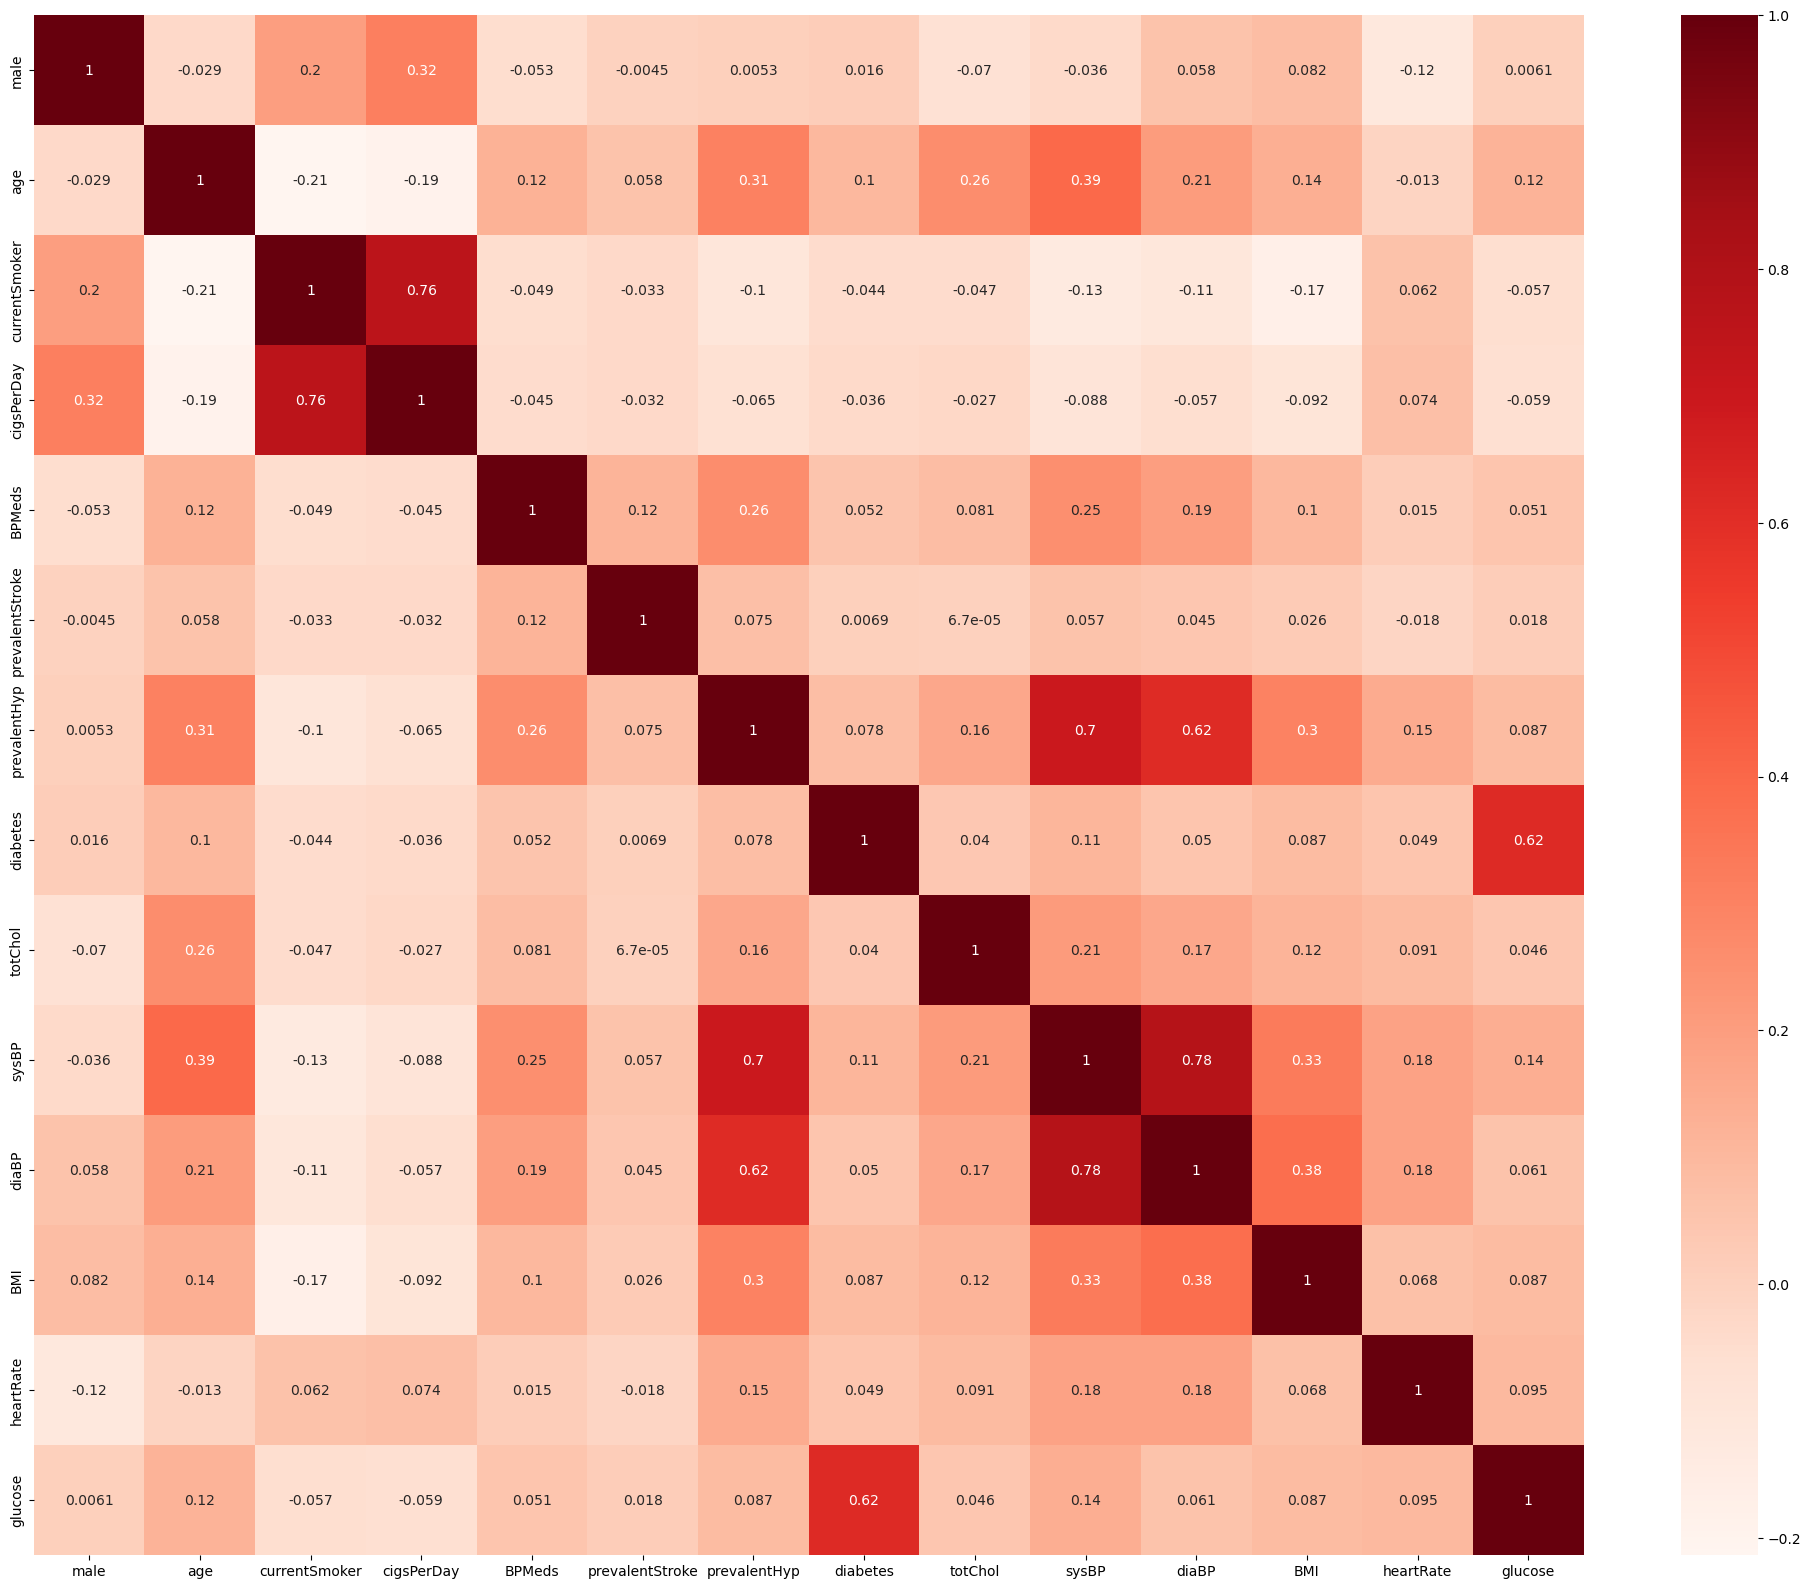

In [13]:
# Menghitung korelasi antara kolom-kolom numerik dalam DataFrame, kecuali kolom 'TenYearCHD'
corr = df.drop(columns='TenYearCHD').corr()
# Membuat heatmap untuk visualisasi korelasi menggunakan seaborn
# figsize=(25, 20) menentukan ukuran gambar (panjang, tinggi) dalam inci
# annot=True untuk menampilkan nilai korelasi dalam sel heatmap
# cmap='Reds' menentukan skema warna yang digunakan untuk heatmap
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, annot=True, ax=ax, cmap='Reds');

Berdasarkan heatmap korelasi, ditemukan bahwa tekanan darah sistolik dan diastolik memiliki korelasi positif kuat, begitu pula dengan berat badan dan BMI. Usia menunjukkan korelasi positif sedang dengan tekanan darah dan prevalensi hipertensi, serta BMI juga berkorelasi dengan tekanan darah. Diabetes berkorelasi kuat dengan kadar glukosa, sementara merokok berkorelasi negatif dengan kolesterol total. Faktor risiko kardiovaskular yang utama adalah usia dan BMI yang berhubungan dengan tekanan darah tinggi dan hipertensi. Intervensi kesehatan perlu fokus pada pengendalian BMI, hipertensi pada usia lanjut, serta kampanye anti-merokok dan pengendalian kolesterol untuk mencegah penyakit jantung.

In [14]:
# Memisahkan fitur (X) dan target (y) dari DataFrame
X = df.drop(columns=['TenYearCHD'])  # X berisi semua kolom kecuali 'TenYearCHD'
target = df['TenYearCHD']  # target adalah kolom 'TenYearCHD'

# Pembagian data menjadi data latih dan data uji menggunakan train_test_split dari sklearn
# test_size=0.2 menentukan proporsi data uji, dalam hal ini 20% dari total data
# random_state=42 untuk memastikan hasil dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Menampilkan bentuk (shape) dari setiap set data (data latih dan data uji)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3390, 14)
y_train shape: (3390,)
X_test shape: (848, 14)
y_test shape: (848,)


In [15]:
# Membuat model dasar (dummy classifier) dengan strategi 'most_frequent'
dummy_classifier = DummyClassifier(strategy='most_frequent')
# Melatih model dummy classifier menggunakan data latih
dummy_classifier.fit(X_train, y_train)
# Memprediksi nilai target menggunakan data uji
y_pred = dummy_classifier.predict(X_test)
# Menghitung akurasi dari model dasar
accuracy = accuracy_score(y_test, y_pred)
# Menampilkan akurasi model dasar
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8538


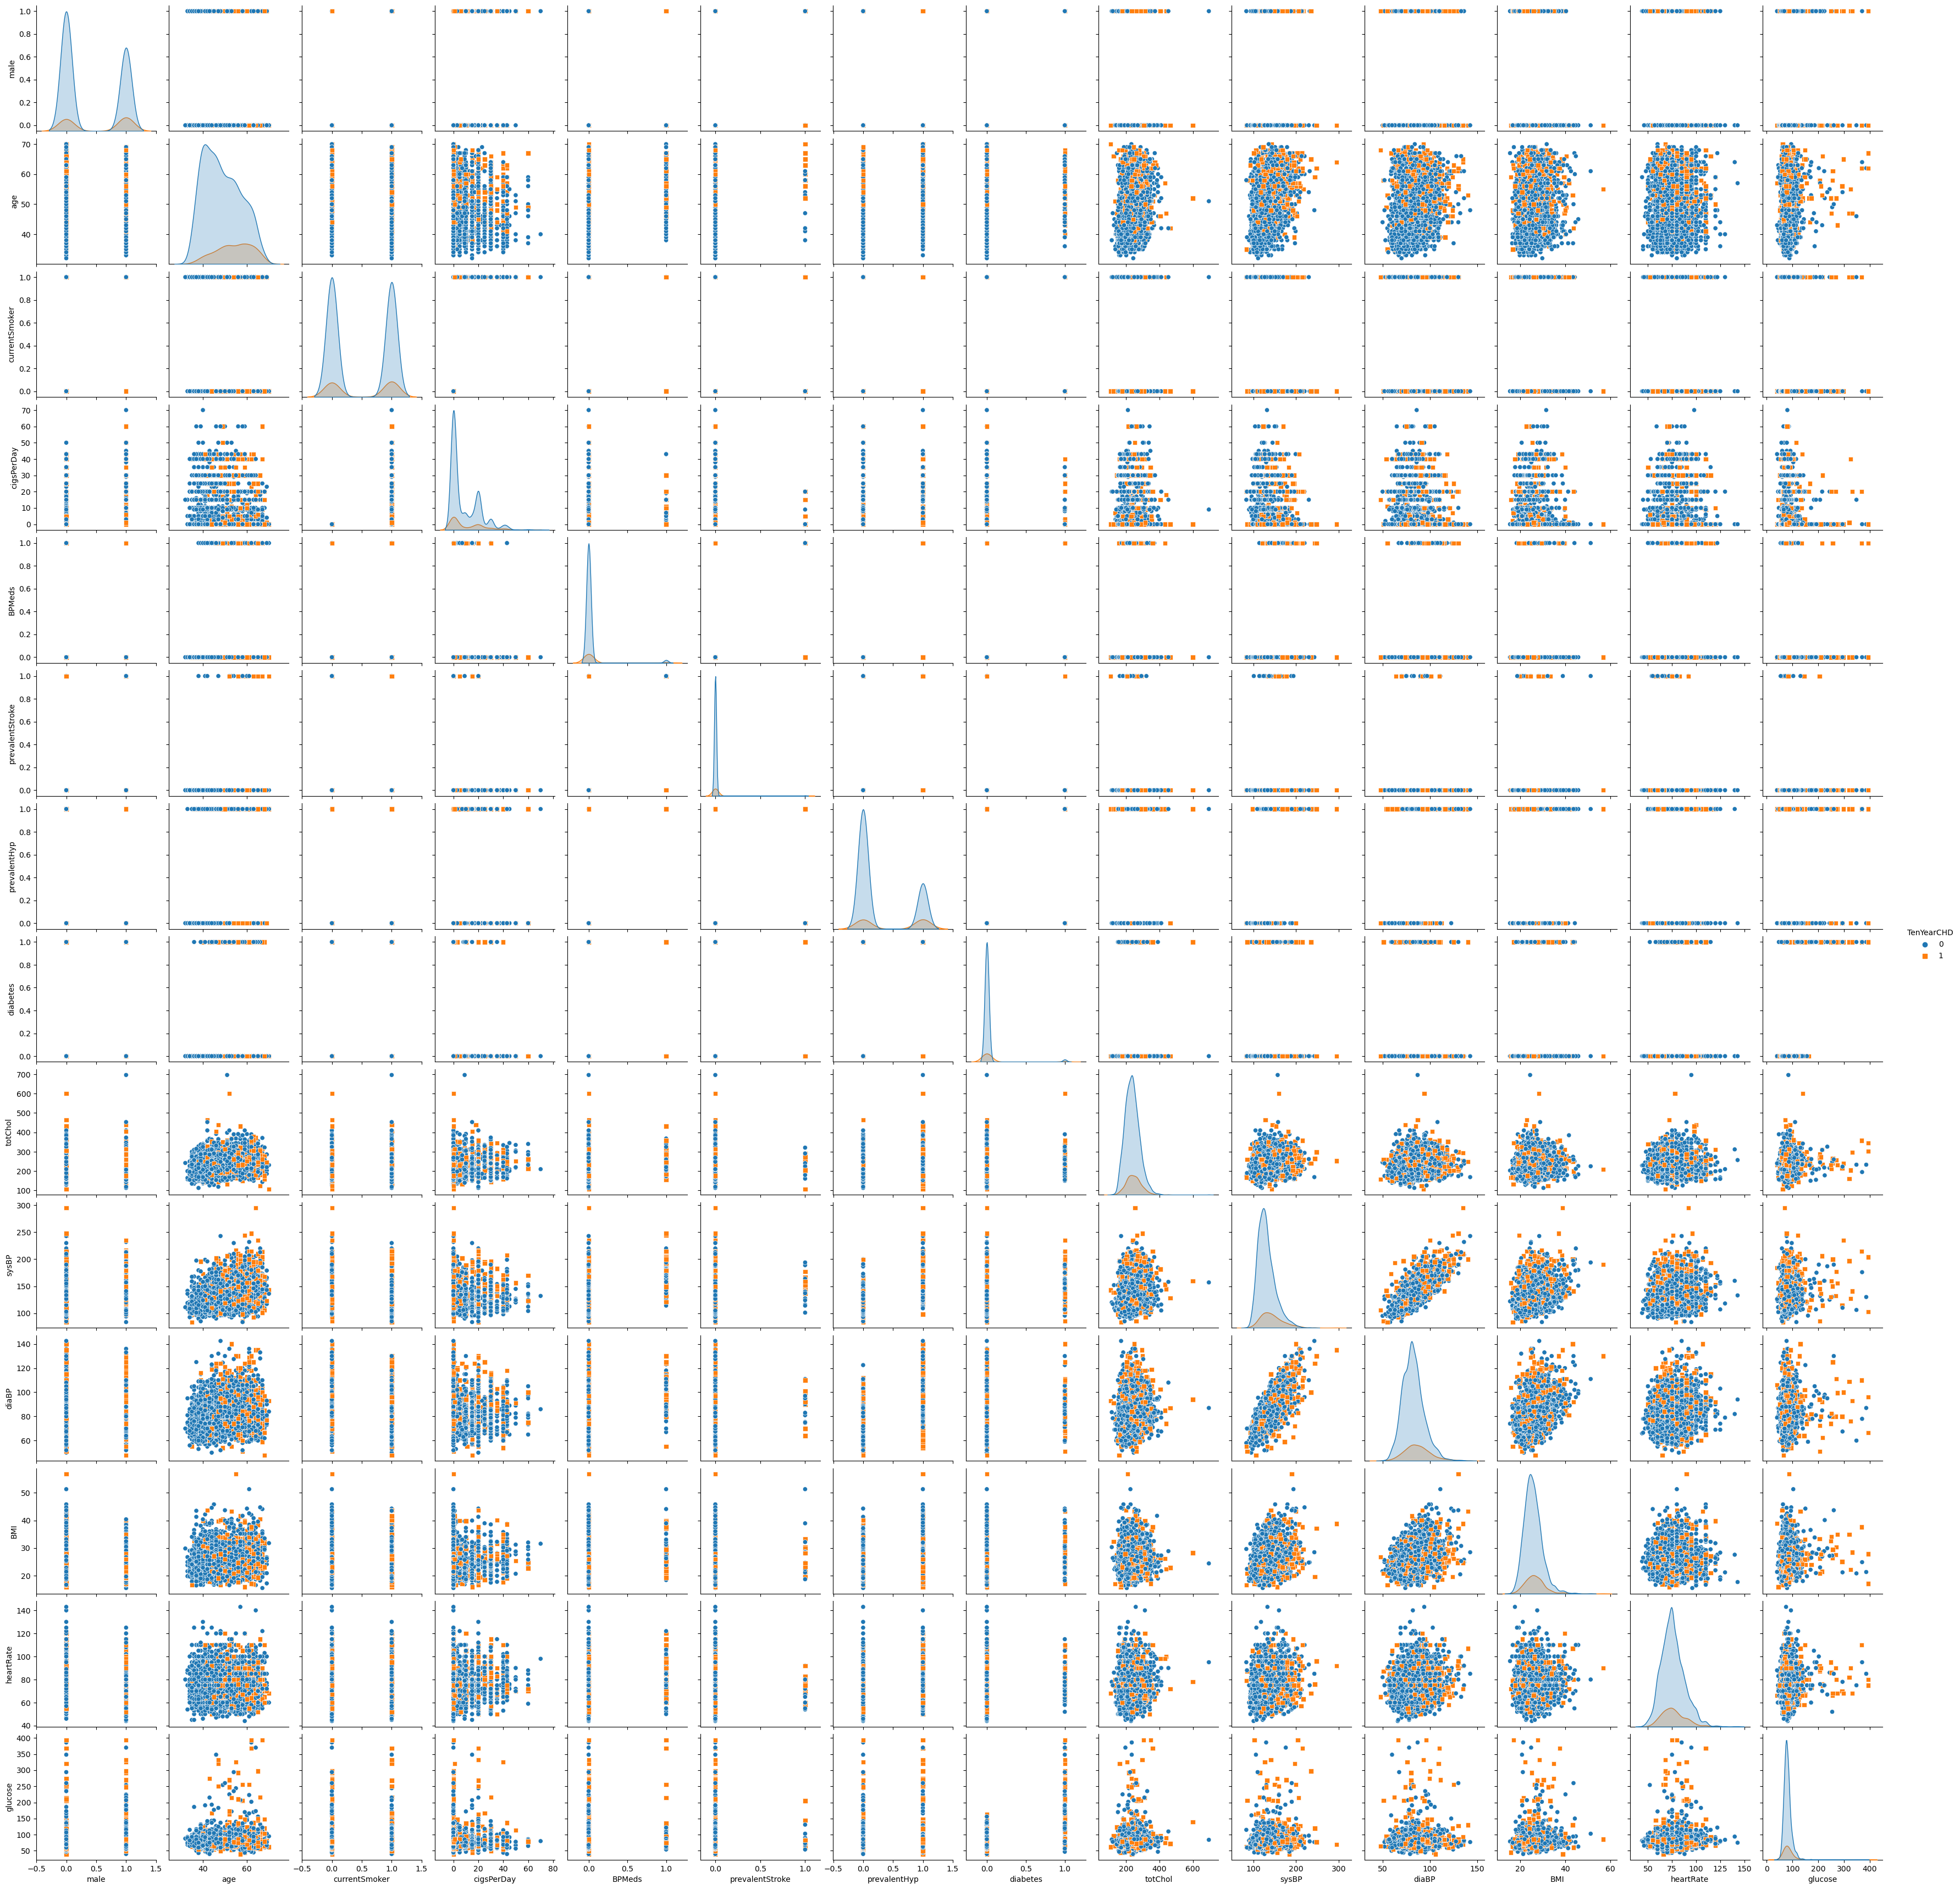

In [16]:
# Membuat pairplot untuk mengeksplorasi hubungan antara variabel-variabel numerik dalam DataFrame
# diag_kind='kde' untuk menampilkan KDE plot pada diagonal utama
# hue='TenYearCHD' untuk membedakan plot berdasarkan nilai dalam kolom 'TenYearCHD'
# markers=["o", "s"] untuk menentukan simbol marker yang digunakan untuk membedakan kategori
sns.pairplot(df, diag_kind='kde', hue='TenYearCHD', markers=["o", "s"])
plt.show()

Gambar di atas menunjukkan pairplot yang mengeksplorasi hubungan antar variabel numerik dalam dataset. Plot ini menggunakan KDE (Kernel Density Estimation) pada diagonal utama dan membedakan data berdasarkan nilai dalam kolom 'TenYearCHD'.
Tujuan Plot: Pairplot ini bertujuan untuk melihat distribusi dan hubungan antar variabel numerik dengan mempertimbangkan status 'TenYearCHD'.
Warna dan Marker:
1. Warna biru dan marker lingkaran ("o") mewakili individu yang tidak mengalami penyakit jantung koroner dalam 10 tahun (TenYearCHD = 0).
2. Warna oranye dan marker kotak ("s") mewakili individu yang mengalami penyakit jantung koroner dalam 10 tahun (TenYearCHD = 1).
Informasi yang Ditampilkan:
1. Distribusi Variabel: KDE pada diagonal utama menunjukkan distribusi setiap variabel untuk kedua kategori.
2. Hubungan Antar Variabel: Scatter plot di luar diagonal menunjukkan hubungan antar variabel numerik, dengan perbedaan kategori 'TenYearCHD' yang terlihat dari warna dan bentuk marker.
Analisis Awal: Dari pairplot ini, dapat dilihat pola distribusi dan korelasi antar variabel yang mungkin membantu dalam memahami faktor-faktor yang berhubungan dengan risiko penyakit jantung koroner dalam 10 tahun.

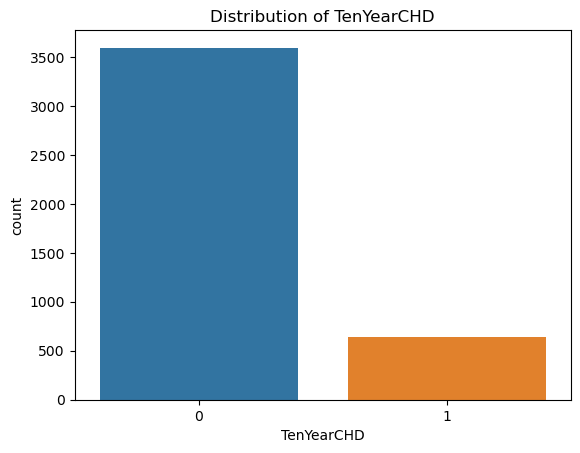

In [17]:
# Membuat count plot untuk menghitung frekuensi kelas dalam kolom 'TenYearCHD'
# x='TenYearCHD' menentukan variabel yang akan dihitung frekuensinya
# data=df adalah DataFrame yang digunakan
sns.countplot(x='TenYearCHD', data=df)
# Menambahkan judul plot
plt.title('Distribution of TenYearCHD')
# Menampilkan plot
plt.show()

Plot di atas menunjukkan distribusi variabel 'TenYearCHD'. Terdapat dua kategori dalam variabel ini:
0: Tidak mengalami penyakit jantung koroner dalam 10 tahun.
1: Mengalami penyakit jantung koroner dalam 10 tahun.
Hasilnya menunjukkan adanya ketidakseimbangan kelas yang signifikan, dengan jumlah individu yang tidak mengalami penyakit jantung koroner (kategori 0) jauh lebih banyak dibandingkan yang mengalami (kategori 1). Ini adalah hal umum dalam dataset medis, di mana kasus positif (penyakit) biasanya lebih sedikit dibandingkan kasus negatif.

In [18]:
# Mengimport MinMaxScaler dari sklearn.preprocessing untuk normalisasi data
from sklearn.preprocessing import MinMaxScaler
# Membuat objek scaler untuk MinMaxScaler
scaler = MinMaxScaler()
# Melakukan normalisasi data menggunakan fit_transform pada objek scaler
X_scaled = scaler.fit_transform(X)

In [19]:
# Menampilkan total nilai NaN dalam X_train
print(X_train.isnull().sum().sum())
# Menampilkan total nilai NaN dalam X_test
print(X_test.isnull().sum().sum())
# Menampilkan total nilai infiniti dalam X_train
print(np.isinf(X_train).sum().sum())
# Menampilkan total nilai infiniti dalam X_test
print(np.isinf(X_test).sum().sum())

419
92
0
0


In [20]:
# Mengimport SimpleImputer dari sklearn.impute untuk melakukan imputasi data
from sklearn.impute import SimpleImputer
# Membuat objek imputer dengan strategi imputasi mean
imputer = SimpleImputer(strategy='mean')
# Melakukan imputasi nilai NaN pada X_train menggunakan fit_transform pada objek imputer
X_train = imputer.fit_transform(X_train)
# Melakukan imputasi nilai NaN pada X_test menggunakan transform pada objek imputer
X_test = imputer.transform(X_test)
# Opsional: Mengganti nilai infinity dengan nilai 0 pada X_train dan X_test
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

In [24]:
# Menampilkan statistik deskriptif untuk dataset X_train setelah preprocessing
print("Descriptive Statistics for X_train:")
print(pd.DataFrame(X_train).describe())

Descriptive Statistics for X_train:
                0            1            2            3            4   \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean      0.422714    49.522124     0.499115     8.994395     0.029623   
std       0.494064     8.577177     0.500073    11.907122     0.168365   
min       0.000000    32.000000     0.000000     0.000000     0.000000   
25%       0.000000    42.000000     0.000000     0.000000     0.000000   
50%       0.000000    49.000000     0.000000     0.000000     0.000000   
75%       1.000000    56.000000     1.000000    20.000000     0.000000   
max       1.000000    70.000000     1.000000    60.000000     1.000000   

                5            6            7            8            9   \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean      0.006195     0.313274     0.025074   236.876643   132.389823   
std       0.078474     0.463893     0.156372    44.483608    22.119682   
m

# MODELING REGRESI LOGISTIK

Logistic Regression Accuracy: 0.8573


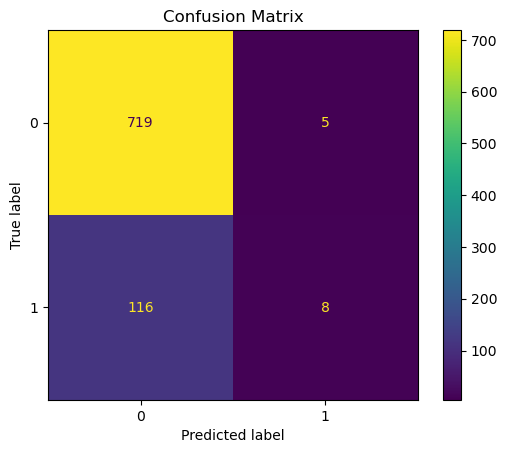

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.62      0.06      0.12       124

    accuracy                           0.86       848
   macro avg       0.74      0.53      0.52       848
weighted avg       0.83      0.86      0.80       848



In [23]:
# Membuat pipeline yang terdiri dari imputer, scaler, dan model Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Menggunakan SimpleImputer dengan strategi mean untuk mengisi nilai yang hilang
    ('scaler', MinMaxScaler()),  # Menggunakan MinMaxScaler untuk normalisasi data
    ('logreg', LogisticRegression(solver='liblinear'))  # Model Logistic Regression dengan solver 'liblinear'
])
# Melatih model dengan data pelatihan
pipeline.fit(X_train, y_train)
# Melakukan prediksi dengan data uji
y_pred = pipeline.predict(X_test)
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
# Menampilkan Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()
# Menampilkan Classification Report
print(classification_report(y_test, y_pred))

Model regresi logistik yang dikembangkan menggunakan pipeline dengan imputer, scaler, dan regresi logistik (solver 'liblinear') mampu mencapai akurasi sebesar 0.8573 dalam memprediksi kasus penyakit jantung berdasarkan dataset yang tersedia. Evaluasi model menunjukkan bahwa model mampu dengan baik dalam mengklasifikasikan kasus negatif (tidak terkena penyakit jantung) dengan tingkat akurasi yang tinggi (86%). Namun, model memiliki performa yang rendah dalam mengenali kasus positif (terkena penyakit jantung), dengan nilai recall yang rendah hanya sebesar 0.06. Hal ini mengindikasikan bahwa model cenderung gagal dalam mengidentifikasi sebagian besar kasus penyakit jantung yang sebenarnya. Analisis lebih lanjut terhadap matriks kebingungan menunjukkan bahwa model cenderung melakukan prediksi yang konservatif, dengan jumlah false negative yang signifikan (124 dari 848 kasus).

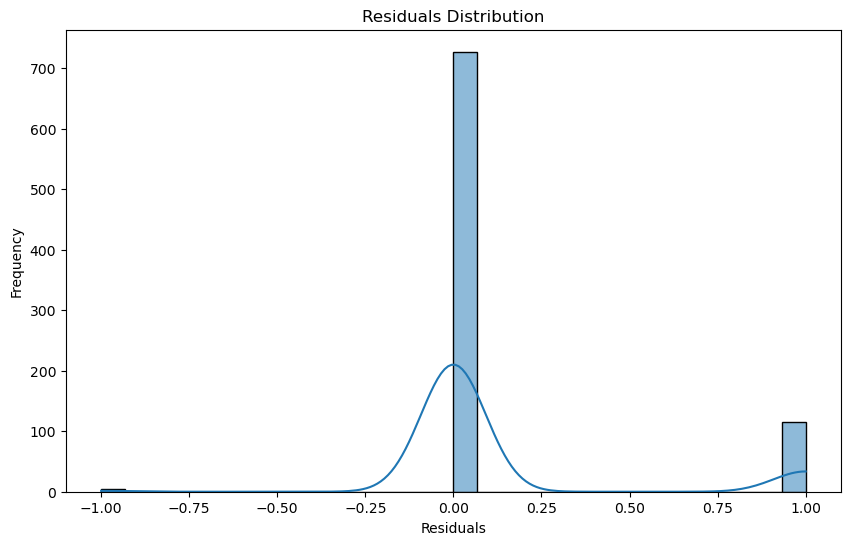

In [22]:
# Menghitung residual
residuals = y_test - y_pred
# Menampilkan distribusi residual
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Distribusi residual yang sebagian besar berada di sekitar nol dengan puncak tajam menunjukkan bahwa model prediksi bekerja dengan baik untuk sebagian besar data. Namun, keberadaan outlier mengindikasikan bahwa ada beberapa data yang tidak diprediksi dengan baik oleh model. Ini menunjukkan bahwa model bisa ditingkatkan lebih lanjut untuk mengurangi jumlah kesalahan prediksi yang ekstrem.

In [25]:
# Cetak beberapa contoh setelah preprocessing
print("Sample data after preprocessing:")
print(X_train[:5])

Sample data after preprocessing:
[[  1.    40.     1.    30.     0.     0.     0.     0.   205.   131.
   81.    23.74  66.    87.  ]
 [  0.    57.     0.     0.     0.     0.     1.     0.   250.   152.5
   92.5   32.31  75.    94.  ]
 [  0.    47.     0.     0.     0.     0.     0.     0.   230.   123.
   71.    26.98  83.    73.  ]
 [  1.    41.     1.    30.     0.     0.     0.     0.   228.   113.
   82.5   25.67  67.    70.  ]
 [  0.    64.     0.     0.     0.     0.     1.     0.   232.   149.5
   84.    20.49  68.    96.  ]]


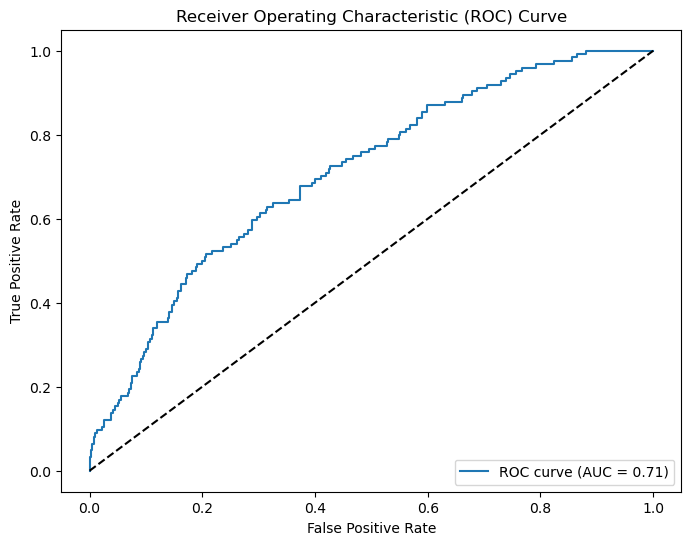

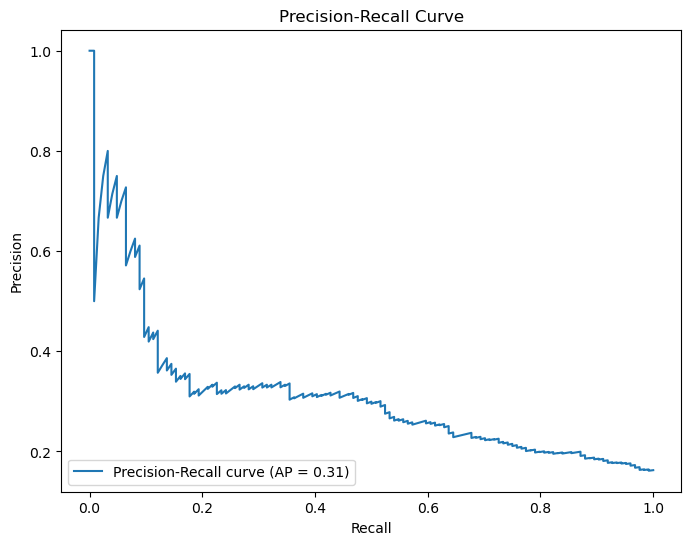

In [27]:
# Prediksi probabilitas menggunakan model pipeline
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Grafik pertama adalah Receiver Operating Characteristic (ROC) Curve, yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR). Kurva ROC ini memiliki Area Under the Curve (AUC) sebesar 0.71, yang mengindikasikan bahwa model memiliki kemampuan yang cukup baik dalam membedakan antara kelas positif dan negatif. Semakin dekat kurva ini ke sudut kiri atas, semakin baik performa model tersebut.

Grafik kedua adalah Precision-Recall Curve, yang menampilkan hubungan antara Precision dan Recall. Kurva ini memiliki nilai Average Precision (AP) sebesar 0.31. Precision-Recall Curve lebih informatif dibandingkan ROC Curve ketika data tidak seimbang, karena lebih fokus pada performa model terhadap kelas positif. Dari grafik ini, kita bisa melihat bahwa precision menurun seiring dengan peningkatan recall, menunjukkan bahwa meskipun model mampu mendeteksi lebih banyak kasus positif (recall tinggi), ketepatan prediksi positif (precision) menurun.

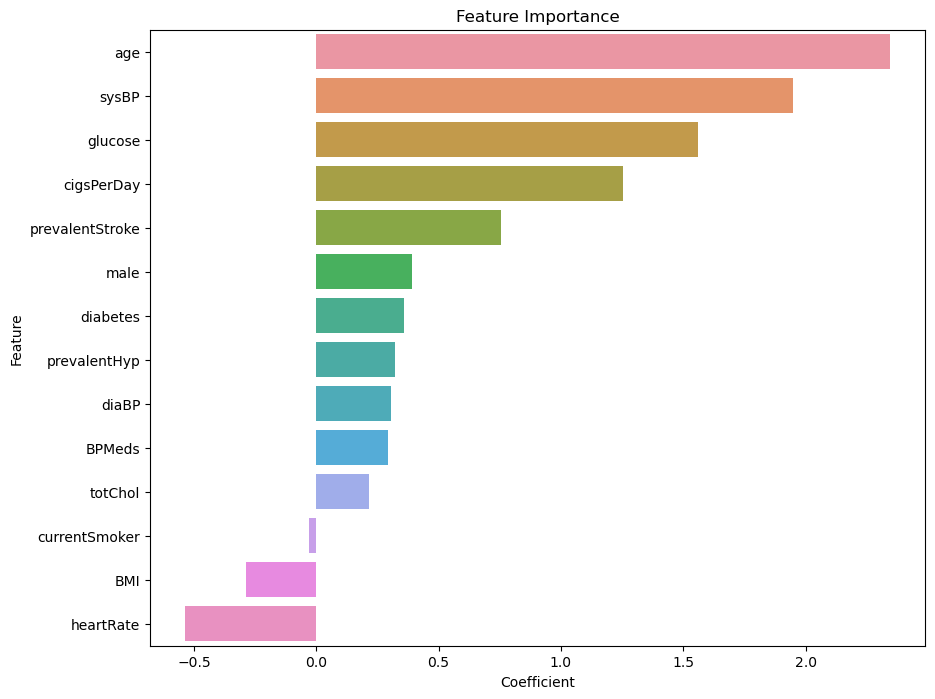

In [28]:
# Mengambil koefisien dari model regresi logistik dalam pipeline
coef = pipeline.named_steps['logreg'].coef_[0]
# Mengambil nama fitur dari X (kolom-kolom)
features = X.columns
# Membuat DataFrame untuk menyimpan fitur dan koefisiennya
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
# Mengurutkan DataFrame berdasarkan nilai koefisien secara menurun
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
# Membuat plot bar untuk menampilkan koefisien fitur
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

Gambar yang ditampilkan merupakan plot batang (bar plot) yang menunjukkan pentingnya fitur (feature importance) dari model regresi logistik yang digunakan. Plot ini menggambarkan koefisien masing-masing fitur dalam model, yang mencerminkan seberapa besar pengaruh setiap fitur terhadap prediksi yang dihasilkan oleh model.

Fitur-fitur dengan koefisien positif besar, seperti 'age', 'sysBP' (systolic blood pressure), 'glucose', dan 'cigsPerDay', memiliki pengaruh signifikan dalam meningkatkan prediksi positif (adanya kejadian yang diprediksi oleh model). Sementara itu, fitur-fitur dengan koefisien negatif, seperti 'BMI' dan 'heartRate', memiliki pengaruh yang berlawanan.

Plot ini menunjukkan bahwa usia (age) merupakan faktor paling penting dalam model, diikuti oleh tekanan darah sistolik (sysBP) dan kadar glukosa (glucose). Fitur-fitur seperti 'cigsPerDay' (jumlah rokok per hari) dan riwayat stroke (prevalentStroke) juga memiliki kontribusi yang signifikan terhadap prediksi model.

In [31]:
#Validasi asumsi regresi logistik
# Fungsi untuk menghitung VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Mengubah X_train dan X_test kembali menjadi DataFrame setelah preprocessing
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Menghitung VIF untuk X_train
vif_df = calculate_vif(X_train_df)
print("Variance Inflation Factors:")
print(vif_df)

Variance Inflation Factors:
            Feature         VIF
0              male    2.070696
1               age   40.432252
2     currentSmoker    4.728957
3        cigsPerDay    3.998317
4            BPMeds    1.129449
5   prevalentStroke    1.021528
6      prevalentHyp    2.374847
7          diabetes    1.577509
8           totChol   31.148895
9             sysBP  138.445628
10            diaBP  135.191921
11              BMI   44.853756
12        heartRate   39.371299
13          glucose   21.546888


In [32]:
# Cross-validation dengan 5-fold
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Scores:")
print(cv_scores)
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

Cross-validation Scores:
[0.8539823  0.85103245 0.85250737 0.8480826  0.84955752]
Mean CV accuracy: 0.8510 (+/- 0.0021)


Oversampling Logistic Regression Accuracy: 0.6392


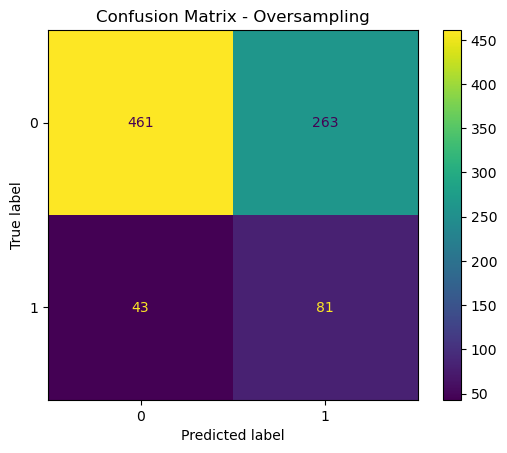

In [33]:
#Penanganan Ketidakseimbangan Kelas
# Membuat pipeline untuk oversampling SMOTE dengan Logistic Regression
pipeline_imb = make_imb_pipeline(SimpleImputer(strategy='mean'),
                                 MinMaxScaler(),
                                 SMOTE(random_state=42),
                                 LogisticRegression(solver='liblinear'))

# Melatih model dengan pipeline oversampling
pipeline_imb.fit(X_train, y_train)

# Evaluasi model oversampling
y_pred_imb = pipeline_imb.predict(X_test)
accuracy_imb = accuracy_score(y_test, y_pred_imb)
print(f"Oversampling Logistic Regression Accuracy: {accuracy_imb:.4f}")

# Confusion Matrix untuk model oversampling
ConfusionMatrixDisplay.from_estimator(pipeline_imb, X_test, y_test)
plt.title('Confusion Matrix - Oversampling')
plt.show()

Dalam mengatasi ketidakseimbangan kelas pada dataset untuk prediksi penyakit jantung, kami menerapkan teknik oversampling menggunakan SMOTE (Synthetic Minority Over-sampling Technique) dalam kombinasi dengan regresi logistik. Hasil evaluasi menunjukkan bahwa model yang telah dilatih dengan teknik oversampling mencapai akurasi sebesar 0.6392. Meskipun peningkatan akurasi terlihat dari pendekatan ini, penting untuk dicatat bahwa evaluasi lebih lanjut diperlukan untuk memahami secara menyeluruh kinerja model ini dalam memprediksi kasus-kasus yang positif (CHD) dengan lebih baik, serta untuk memastikan bahwa peningkatan ini tidak mengorbankan keandalan model dalam mengklasifikasikan kasus negatif dengan benar. Analisis lebih lanjut termasuk pemeriksaan detail terhadap matriks kebingungan (confusion matrix) dan metrik evaluasi lainnya diperlukan untuk mengonfirmasi keunggulan teknik oversampling ini dalam konteks spesifik dataset yang digunakan.